In [93]:
import numpy as np
from sklearn.cluster import KMeans

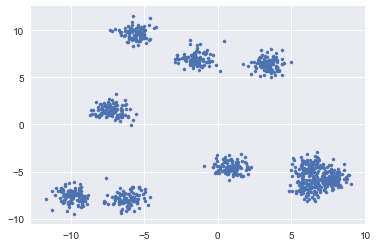

In [94]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=10,
                       cluster_std=0.60, random_state=100)
plt.scatter(X[:, 0], X[:, 1], s=10);

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

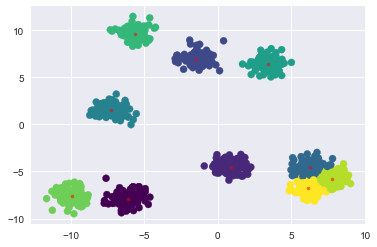

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=10, alpha=0.5);

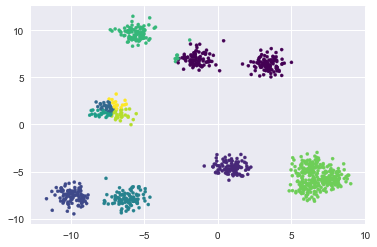

In [97]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 10)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=10, cmap='viridis');

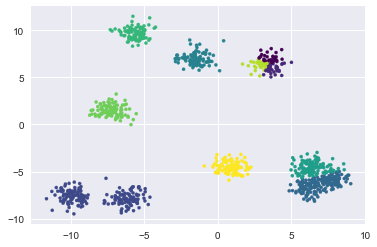

In [98]:
centers, labels = find_clusters(X, 10, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=10, cmap='viridis');

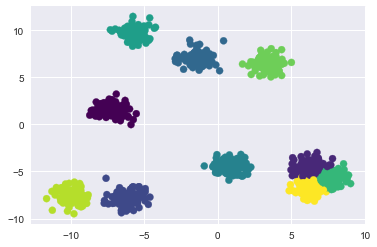

In [99]:
labels = KMeans(10, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');